# README

We are going to show the SNR dependence on the TI value for each curve within this script

# Libraries

In [6]:
#Preparing all libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import addcopyfighandler
import statistics
import math
import time
from tqdm import trange
from matplotlib import cm
import sklearn
from sklearn.cluster import KMeans
import colorsys
from datetime import date
import pickle
import functools

# Initialization

In [17]:
######All Fixed parameters for code
#Parameters held constant
T11 = 600
T12 = 1200
c1 = 0.3
c2 = 0.7 
T21 = 40
T22 = 100

true_params = np.array([T11, T12, c1, c2, T21, T22])

#Building the TE array - this should be a uniform array
n_points = 64
TE_step = 8

TE_DATA = np.linspace(TE_step, TE_step*n_points, n_points) #ms units

assert(TE_DATA[-1] == 512)
d_TE = np.mean(np.diff(TE_DATA))
assert(d_TE == 8)

SNR_value = 100


######### TI list of points used in the initial evaluation
TI_DATA = np.logspace(1, 3.5, 40)

[  10.           11.59051048   13.43399333   15.57068405   18.04721767
   20.91764656   24.24462017   28.10075242   32.57020656   37.75053205
   43.75479375   50.71403957   58.78016072   68.12920691   78.96522868
   91.52473109  106.08183551  122.95426266  142.51026703  165.1766744
  191.44819762  221.89823415  257.19138091  298.09793966  345.51072946
  400.46457318  464.15888336  537.98384034  623.55073413  722.72713207
  837.67764007  970.91114687 1125.3355826  1304.32138672 1511.77507062
 1752.22448041 2030.9176209  2353.93719755 2728.33337649 3162.27766017]


# Functions

In [18]:
#Defining the function of interest

def S_biX_6p(TE, T11, T12, c1, c2, T21, T22, TI = 0):
    exp1 = c1*(1-2*np.exp(-TI/T11))*np.exp(-TE/T21)
    exp2 = c2*(1-2*np.exp(-TI/T12))*np.exp(-TE/T22)
    return exp1 + exp2

#All curves get noise according to this equation
def add_noise(data, SNR):
    #returns a noised vector of data using the SNR given
    sigma = (c1+c2)/SNR #np.max(np.abs(data))/SNR
    noise = np.random.normal(0,sigma,data.shape)
    noised_data = data + noise
    return noised_data

# Generate Data

In [19]:
all_data = np.zeros((TI_DATA.shape[0], TE_DATA.shape[0]))

for iTI in range(TI_DATA.shape[0]):
    all_data[iTI,:] = S_biX_6p(TE_DATA, *true_params, TI = TI_DATA[iTI])

noised_data = add_noise(all_data, SNR_value)

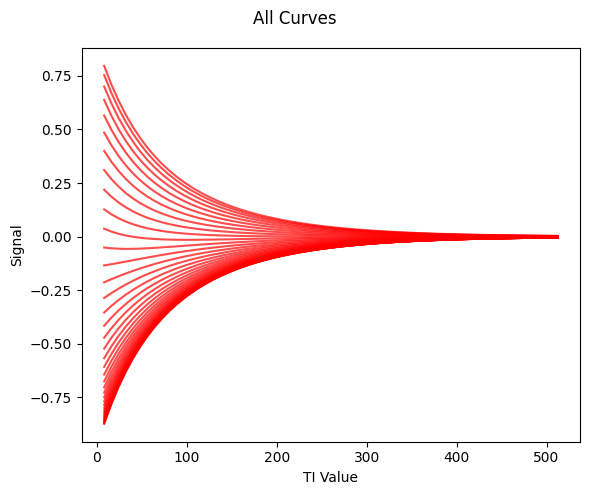

In [20]:
fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
fig.suptitle(f'All Curves')

for iTI in range(TI_DATA.shape[0]):
    ax.plot(TE_DATA, all_data[iTI,:], alpha = 0.7, color = 'r')

ax.set_xlabel('TI Value')
ax.set_ylabel('Signal')

plt.show()

In [21]:
init_val = all_data[:,0]
assumed_sig = 1/SNR_value

actual_SNR = init_val/assumed_sig

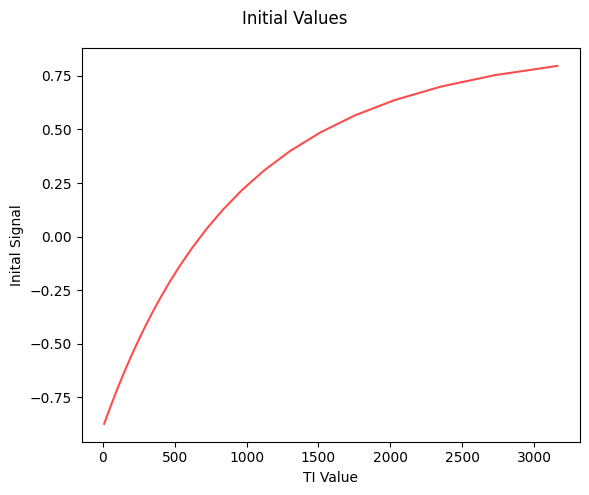

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6,5), tight_layout=True)
fig.suptitle(f'Initial Values')

ax.plot(TI_DATA, init_val, alpha = 0.7, color = 'r')

ax.set_xlabel('TI Value')
ax.set_ylabel('Inital Signal')

plt.show()

In [28]:
errors = noised_data - all_data

exp_std = np.std(errors, axis = 1)

exp_SNR = init_val/exp_std

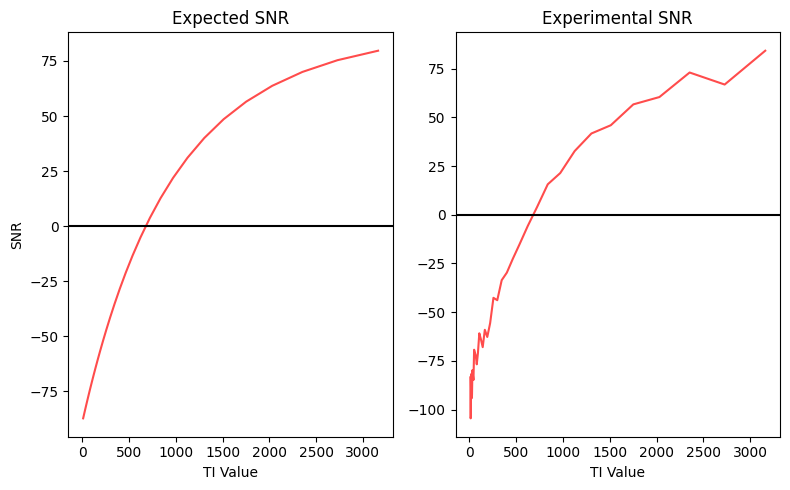

In [32]:
fig, ax = plt.subplots(1,2, figsize=(8,5), tight_layout=True)

ax[0].plot(TI_DATA, actual_SNR, alpha = 0.7, color = 'r')
ax[0].axhline(y = 0, color = 'k')

ax[0].set_xlabel('TI Value')
ax[0].set_ylabel('SNR')
ax[0].set_title('Expected SNR')

ax[1].plot(TI_DATA, exp_SNR, alpha = 0.7, color = 'r')
ax[1].axhline(y = 0, color = 'k')

ax[1].set_xlabel('TI Value')
# ax[1].set_ylabel('SNR')
ax[1].set_title('Experimental SNR')

plt.show()